**Setup (Import library)**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read data**

In [ ]:
#Dataset drive link: https://drive.google.com/file/d/131tfMf4rGCKxSvxh2x7LPBtqOc4v-EFE/view?usp=sharing

path = 'drive/MyDrive/Colab Notebooks/Dataset/job_data.csv'
job_data = pd.read_csv(path)
job_data.head()

,Gender,Age,SSC,HSC,Honors Department,Masters Department,SSC Result,HSC Result,Honors Result,Masters Result,S.Q,Previous Job,Period of Job,New Job
0,1,24,2,2,12,12,5.0,5.0,4.00,3.75,37;39,0,0,46
1,1,26,2,2,13,13,3.5,2.0,3.25,3.50,28;29;30;32;33;34;39,0,0,42
2,1,30,2,2,14,14,3.5,3.0,3.50,3.75,29;36,46,4,48
3,1,27,2,2,15,15,4.0,4.0,3.75,3.50,29;38;39,47,2,48
4,1,23,2,2,10,0,4.0,3.5,3.50,0.00,27;28;29;33;34;36;38;39,0,0,40


**Visualize data**

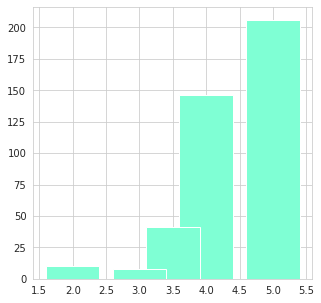

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(job_data["SSC Result"].value_counts().keys()),list(job_data["SSC Result"].value_counts()),color="#7FFFD4")
plt.show()

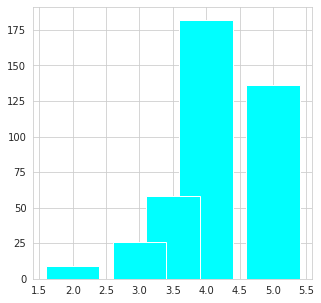

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(job_data["HSC Result"].value_counts().keys()),list(job_data["HSC Result"].value_counts()),color="#00FFFF")
plt.show()

Text(0.5, 0.98, 'Honors & Masters Result')

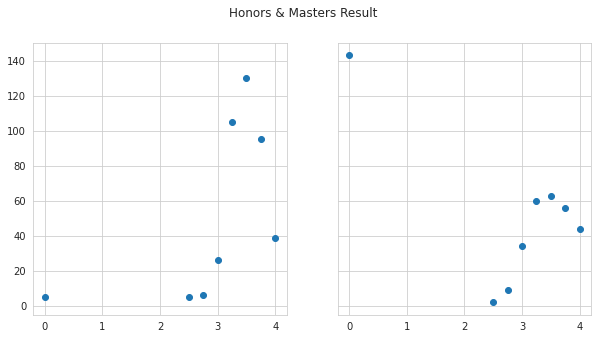

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].scatter(list(job_data["Honors Result"].value_counts().keys()),list(job_data["Honors Result"].value_counts()))
axs[1].scatter(list(job_data["Masters Result"].value_counts().keys()),list(job_data["Masters Result"].value_counts()))

fig.suptitle('Honors & Masters Result')

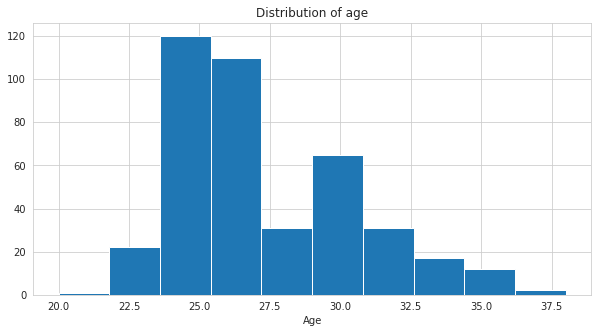

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(job_data["Age"])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.show()

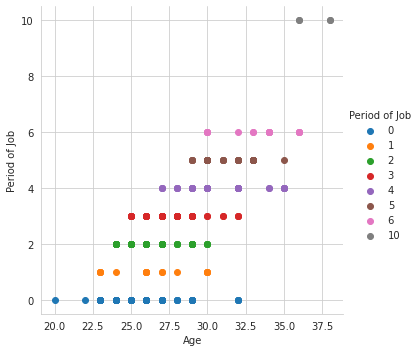

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(job_data, hue="Period of Job", height=5) \
.map(plt.scatter, "Age", "Period of Job") \
.add_legend()
plt.show()

In [ ]:
job_data["SSC"].value_counts()
#job_data["HSC"].value_counts()
#job_data["Honors Department"].value_counts()
#job_data["Masters Department"].value_counts()

1    164
2    155
3     92
Name: SSC, dtype: int64

**Null value check**

In [ ]:
#job_data.isnull().sum()
job_data.isnull().values.any()

False

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scl_ag = scaler.fit_transform(job_data[['Age']])
scl_ssc_result = scaler.fit_transform(job_data[['SSC Result']])
scl_hsc_result = scaler.fit_transform(job_data[['HSC Result']])
scl_honors_result = scaler.fit_transform(job_data[['Honors Result']])
scl_masters_result = scaler.fit_transform(job_data[['Masters Result']])

job_data['Age'] = scl_ag
job_data['SSC Result'] = scl_ssc_result
job_data['HSC Result'] = scl_hsc_result
job_data['Honors Result'] = scl_honors_result
job_data['Masters Result'] = scl_masters_result

job_data.head()

,Gender,Age,SSC,HSC,Honors Department,Masters Department,SSC Result,HSC Result,Honors Result,Masters Result,S.Q,Previous Job,Period of Job,New Job
0,1,0.222222,2,2,12,12,1.000000,1.000000,1.0000,0.9375,37;39,0,0,46
1,1,0.333333,2,2,13,13,0.500000,0.000000,0.8125,0.8750,28;29;30;32;33;34;39,0,0,42
2,1,0.555556,2,2,14,14,0.500000,0.333333,0.8750,0.9375,29;36,46,4,48
3,1,0.388889,2,2,15,15,0.666667,0.666667,0.9375,0.8750,29;38;39,47,2,48
4,1,0.166667,2,2,10,0,0.666667,0.500000,0.8750,0.0000,27;28;29;33;34;36;38;39,0,0,40


##**Model**

In [ ]:
x = job_data.drop(['New Job'], axis=1)
y = job_data['New Job']

print(x.head(), y.head())

   Gender       Age  SSC  ...                      S.Q  Previous Job  Period of Job
0       1  0.222222    2  ...                    37;39             0              0
1       1  0.333333    2  ...     28;29;30;32;33;34;39             0              0
2       1  0.555556    2  ...                    29;36            46              4
3       1  0.388889    2  ...                 29;38;39            47              2
4       1  0.166667    2  ...  27;28;29;33;34;36;38;39             0              0

[5 rows x 13 columns] 0    46
1    42
2    48
3    48
4    40
Name: New Job, dtype: object


In [ ]:
def toPaddedList(inp, max_len=10):
    # Chaning string to list
    lst = list(map(int, inp.split(';')))
    tot = len(lst)

    # Padding list by placing 0 at first place
    # also increasing the classification label
    if max_len != None:
        lst = [-1 for i in range(max_len-tot)] + [i+1 for i in lst]
    else:
        lst = [i+1 for i in lst]

    return lst


x['S.Q'] = x['S.Q'].map(toPaddedList)
#y = y.map(lambda a: toPaddedList(a, None))
y = y.map(lambda a: toPaddedList(a, 6))

In [ ]:
x.head()

,Gender,Age,SSC,HSC,Honors Department,Masters Department,SSC Result,HSC Result,Honors Result,Masters Result,S.Q,Previous Job,Period of Job
0,1,0.222222,2,2,12,12,1.000000,1.000000,1.0000,0.9375,"[-1, -1, -1, -1, -1, -1, -1, -1, 38, 40]",0,0
1,1,0.333333,2,2,13,13,0.500000,0.000000,0.8125,0.8750,"[-1, -1, -1, 29, 30, 31, 33, 34, 35, 40]",0,0
2,1,0.555556,2,2,14,14,0.500000,0.333333,0.8750,0.9375,"[-1, -1, -1, -1, -1, -1, -1, -1, 30, 37]",46,4
3,1,0.388889,2,2,15,15,0.666667,0.666667,0.9375,0.8750,"[-1, -1, -1, -1, -1, -1, -1, 30, 39, 40]",47,2
4,1,0.166667,2,2,10,0,0.666667,0.500000,0.8750,0.0000,"[-1, -1, 28, 29, 30, 34, 35, 37, 39, 40]",0,0


In [ ]:
y.head()

0    [-1, -1, -1, -1, -1, 47]
1    [-1, -1, -1, -1, -1, 43]
2    [-1, -1, -1, -1, -1, 49]
3    [-1, -1, -1, -1, -1, 49]
4    [-1, -1, -1, -1, -1, 41]
Name: New Job, dtype: object

In [ ]:
tmp1 = x.drop(['S.Q'], axis=1).to_numpy()
tmp2 = np.array(x['S.Q'].to_list())
x = np.concatenate([tmp1, tmp2], axis=1)
y = np.array(y.to_list())

print(x.shape, y.shape)

(411, 22) (411, 6)


In [ ]:
#from sklearn.preprocessing import MultiLabelBinarizer
#y = MultiLabelBinarizer().fit_transform(y.to_list())

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)
print("Train:", xtrain.shape, ytrain.shape)
print("Test:", xtest.shape, ytest.shape)

Train: (328, 22) (328, 6)
Test: (83, 22) (83, 6)


### **Without data augmentation**

In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf_model = MultiOutputClassifier(RandomForestClassifier(max_depth=120,
                                                        min_samples_split=5,
                                                        random_state=1))
rf_model.fit(xtrain, ytrain)
RF_train_score = rf_model.score(xtrain, ytrain)
RF_test_score = rf_model.score(xtest, ytest)

print("Train score:", RF_train_score)
print("Test score:", RF_test_score)

Train score: 0.9634146341463414
Test score: 0.7831325301204819


In [ ]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
neigh = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3))
neigh.fit(xtrain, ytrain)

knn_train_score = neigh.score(xtrain, ytrain)
knn_test_score = neigh.score(xtest, ytest)

print("Train score:", knn_train_score)
print("Test score:", knn_test_score)

Train score: 0.8780487804878049
Test score: 0.6626506024096386


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = MultiOutputClassifier(GaussianNB())
nb_clf.fit(xtrain, ytrain)

nb_train_score = nb_clf.score(xtrain, ytrain)
nb_test_score = nb_clf.score(xtest, ytest)

print("Train score:", nb_train_score)
print("Test score:", nb_test_score)

Train score: 0.4329268292682927
Test score: 0.3132530120481928


In [ ]:
# SVM Algorithm
from sklearn.svm import SVC
svm_clf = MultiOutputClassifier(SVC(gamma='auto'))
svm_clf.fit(xtrain, ytrain)

svm_train_score = svm_clf.score(xtrain, ytrain)
svm_test_score = svm_clf.score(xtest, ytest)

print("Train score:", svm_train_score)
print("Test score:", svm_test_score)

Train score: 0.8780487804878049
Test score: 0.7710843373493976


**VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto', probability=True)

eclf1 = MultiOutputClassifier(VotingClassifier(estimators=[('rf', clf1), ('knn', clf2), ('gnb', clf3), ('svm', clf4)], voting='hard'))
eclf1.fit(xtrain, ytrain)

eclf1_train_score = eclf1.score(xtrain, ytrain)
eclf1_test_score = eclf1.score(xtest, ytest)

print("Train score:", eclf1_train_score)
print("Test score:", eclf1_test_score)
print("..............................")

eclf2 = MultiOutputClassifier(VotingClassifier(estimators=[('rf', clf1), ('knn', clf2), ('gnb', clf3), ('svm', clf4)], 
                                               voting='soft' , 
                                               weights=[2,1,1,1], 
                                               flatten_transform=True ))
eclf2.fit(xtrain, ytrain)
eclf2_train_score = eclf2.score(xtrain, ytrain)
eclf2_test_score = eclf2.score(xtest, ytest)

print("Train score:", eclf2_train_score)
print("Test score:", eclf2_test_score)


Train score: 0.9573170731707317
Test score: 0.8192771084337349
..............................
Train score: 0.9878048780487805
Test score: 0.8313253012048193


## **Data augmentation**

In [ ]:
def augment_data(x, y, param=[(0, 0.1), (0.1, 0.1), (0.1, 0.15)]):
    np.random.seed(42)
    tmpx = [x]
    tmpy = [y]
    

    for (mean, median) in param:
        # Changing the CGPA in SSC, HSC, and Grad grades
        tmp_x = np.random.normal(loc=mean, scale=median, size=x.shape)
        _x = x.copy()

        _x[6] += tmp_x[6]
        _x[7] += tmp_x[7]
        _x[8] += tmp_x[8]
        _x[9] += tmp_x[9]

        # Drop out some of the S.Q.

        tmpx.append(_x)
        tmpy.append(y)
    
    new_xt = np.concatenate(tmpx, axis=0)
    new_yt = np.concatenate(tmpy, axis=0)
    return new_xt, new_yt

In [ ]:
aug_xtrain, aug_ytrain = augment_data(xtrain, ytrain)

print(aug_xtrain.shape, aug_ytrain.shape)

(1312, 22) (1312, 6)


In [ ]:
# Random Forest Algorithm
rf_model.fit(aug_xtrain, aug_ytrain)
RF_train_score2 = rf_model.score(xtrain, ytrain)
RF_test_score2 = rf_model.score(xtest, ytest)

print("Train score:", RF_train_score2)
print("Test score:", RF_test_score2)

Train score: 1.0
Test score: 0.8313253012048193


In [ ]:
# KNN Algorithm
neigh.fit(aug_xtrain, aug_ytrain)
knn_train_score2 = neigh.score(xtrain, ytrain)
knn_test_score2 = neigh.score(xtest, ytest)

print("Train score:", knn_train_score2)
print("Test score:", knn_test_score2)

Train score: 1.0
Test score: 0.8674698795180723


In [ ]:
# Naive Bayes
nb_clf.fit(aug_xtrain, aug_ytrain)
nb_train_score2 = nb_clf.score(xtrain, ytrain)
nb_test_score2 = nb_clf.score(xtest, ytest)

print("Train score:", nb_train_score2)
print("Test score:", nb_test_score2)

Train score: 0.4298780487804878
Test score: 0.3132530120481928


In [ ]:
# SVM Algorithm
svm_clf.fit(aug_xtrain, aug_ytrain)
svm_train_score2 = svm_clf.score(xtrain, ytrain)
svm_test_score2 = svm_clf.score(xtest, ytest)

print("Train score:", svm_train_score2)
print("Test score:", svm_test_score2)

Train score: 0.9390243902439024
Test score: 0.8313253012048193


**VotingClassifier**

In [ ]:
eclf1.fit(aug_xtrain, aug_ytrain)
eclf1_train_score2 = eclf1.score(xtrain, ytrain)
eclf1_test_score2 = eclf1.score(xtest, ytest)

print("Train score:", eclf1_train_score2)
print("Test score:", eclf1_test_score2)
print("..............................")


eclf2.fit(aug_xtrain, aug_ytrain)
eclf2_train_score2 = eclf2.score(xtrain, ytrain)
eclf2_test_score2 = eclf2.score(xtest, ytest)

print("Train score:", eclf2_train_score2)
print("Test score:", eclf2_test_score2)


Train score: 1.0
Test score: 0.8674698795180723
..............................
Train score: 1.0
Test score: 0.8433734939759037


**Accuracy Visualization**

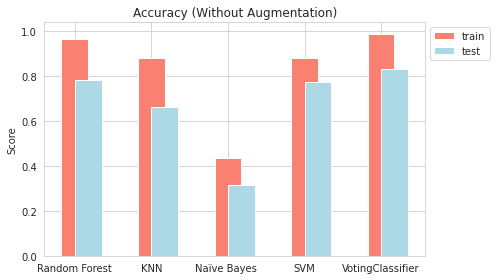

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Random Forest', 'KNN', 'Naïve Bayes ', 'SVM', 'VotingClassifier']
TrainScore0 = [RF_train_score, knn_train_score, nb_train_score, svm_train_score, eclf2_train_score]
TestScore0 = [RF_test_score, knn_test_score, nb_test_score, svm_test_score, eclf2_test_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x , TrainScore0, width, label='train', color="salmon")
rects2 = ax.bar(x + width/2, TestScore0, width, label='test', color="lightblue")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Accuracy (Without Augmentation)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

fig.tight_layout()
plt.show()

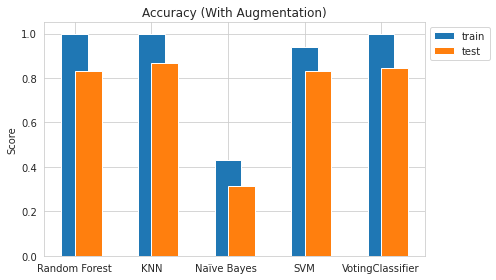

In [ ]:
TrainScore1 = [RF_train_score2, knn_train_score2, nb_train_score2, svm_train_score2, eclf2_train_score2]
TestScore1 = [RF_test_score2, knn_test_score2, nb_test_score2, svm_test_score2, eclf2_test_score2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x , TrainScore1, width, label='train')
rects2 = ax.bar(x + width/2, TestScore1, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Accuracy (With Augmentation)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Random Forest Accuracy')

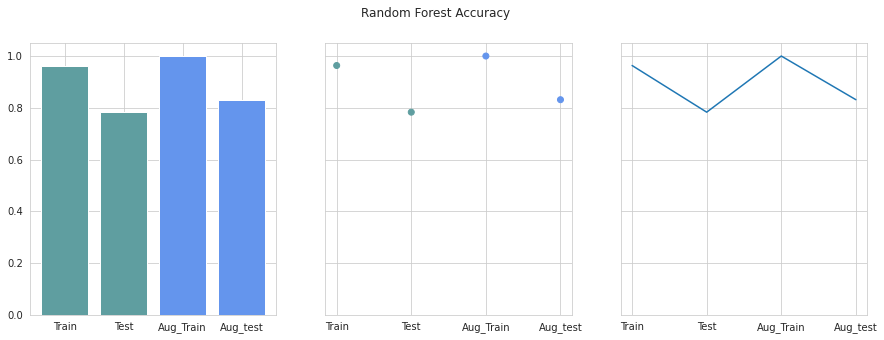

In [ ]:
data = {'Train': RF_train_score, 'Test': RF_test_score, 'Aug_Train': RF_train_score2, 'Aug_test': RF_test_score2}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values, color=['#5F9EA0', '#5F9EA0','#6495ED','#6495ED'])
axs[1].scatter(names, values, color=['#5F9EA0', '#5F9EA0','#6495ED','#6495ED'])
axs[2].plot(names, values)
fig.suptitle('Random Forest Accuracy')

# **Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#y_pred = rf_model.predict(xtest)
#y_pred = rf_model.predict(aug_xtrain)
#ytest = aug_ytrain

#report = classification_report(ytest[:, 5], y_pred[:, 5], labels=np.unique(y_pred[:, 5]))
#print(report)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Random Forest
y_pred = rf_model.predict(xtest)
print("Accuracy:", format(accuracy_score(ytest[:, 5], y_pred[:, 5]) , ".2f"))
print("Precision:", format(precision_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest[:, 5], y_pred[:, 5], average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))

Accuracy: 0.86
Precision: 0.73
Recall: 0.86
F1 Score: 0.73


In [ ]:
#KNN
y_pred = neigh.predict(xtest)
print("Accuracy:", format(accuracy_score(ytest[:, 5], y_pred[:, 5]) , ".2f"))
print("Precision:", format(precision_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("F1 Score:", format(f1_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))

Accuracy: 0.89
Precision: 0.79
Recall: 0.83
F1 Score: 0.81


In [ ]:
# Naive Bayes
y_pred = nb_clf.predict(xtest)
print("Accuracy:", format(accuracy_score(ytest[:, 5], y_pred[:, 5]) , ".2f"))
print("Precision:", format(precision_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest[:, 5], y_pred[:, 5], average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))

Accuracy: 0.45
Precision: 0.45
Recall: 0.45
F1 Score: 0.43


In [ ]:
# SVM
y_pred = svm_clf.predict(xtest)
print("Accuracy:", format(accuracy_score(ytest[:, 5], y_pred[:, 5]) , ".2f"))
print("Precision:", format(precision_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest[:, 5], y_pred[:, 5], average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))

Accuracy: 0.86
Precision: 0.76
Recall: 0.86
F1 Score: 0.75


In [ ]:
# Voting Classifier
y_pred = eclf1.predict(xtest)
print("Accuracy:", format(accuracy_score(ytest[:, 5], y_pred[:, 5]) , ".2f"))
print("Precision:", format(precision_score(ytest[:, 5], y_pred[:, 5], average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))
print("F1 Score:", format(f1_score(ytest[:, 5], y_pred[:, 5], average='macro'), ".2f"))

Accuracy: 0.89
Precision: 0.84
Recall: 0.83
F1 Score: 0.83
